<a href="https://colab.research.google.com/github/afinoor/machine-learning-to-reduce-arsenic-poisoning/blob/main/Using_machine_learning_to_aid_initiatives_to_reduce_arsenic_poisoning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing relevant libraries. 

In [ ]:
import pandas as pd
from google.colab import drive
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Importing and Cleaning the Dataset

In [ ]:
df = pd.read_csv("http://www.stat.columbia.edu/~gelman/arm/examples/arsenic/wells.dat")
df.head()

,"switch ""arsenic"" ""dist"" ""assoc"" ""educ"""
0,1 1 2.36 16.8260002136230 0 0
1,2 1 0.71 47.3219985961914 0 0
2,3 0 2.07 20.9669990539551 0 10
3,4 1 1.15 21.4860000610352 0 12
4,5 1 1.1 40.8740005493164 1 14


The complete dataset is imported in one column. Fortunately, data in each row is separated by space. 

In [ ]:
df = df['switch "arsenic" "dist" "assoc" "educ"'].str.split(" ",expand=True)
df = df.drop([df.columns[0]], axis = 1)
df.columns = ["switch", "arsenic", "dist", "assoc", "educ"]
df.head()

,switch,arsenic,dist,assoc,educ
0,1,2.36,16.8260002136230,0,0
1,1,0.71,47.3219985961914,0,0
2,0,2.07,20.9669990539551,0,10
3,1,1.15,21.4860000610352,0,12
4,1,1.1,40.8740005493164,1,14


In [ ]:
for column in df.columns.tolist():
  print(column)
  print(df[column].isnull().value_counts())
  print("")

switch
False    3020
Name: switch, dtype: int64

arsenic
False    3020
Name: arsenic, dtype: int64

dist
False    3020
Name: dist, dtype: int64

assoc
False    3020
Name: assoc, dtype: int64

educ
False    3020
Name: educ, dtype: int64



In [ ]:
df = df.astype('float')

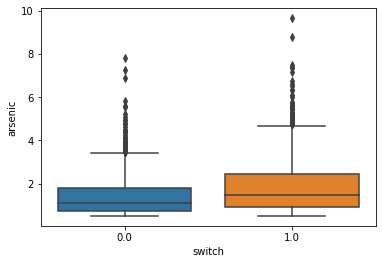

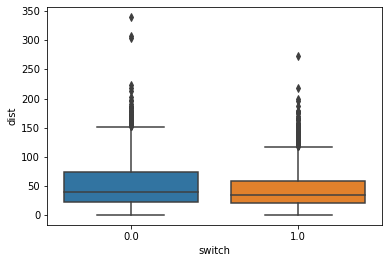

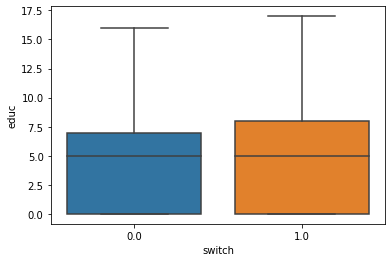

In [ ]:
continuous_variables = ['arsenic', 'dist', 'educ']
for column in continuous_variables:
  sns.boxplot(x = 'switch', y = column, data = df)
  plt.show()

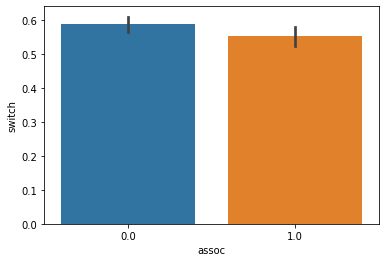

In [ ]:
sns.barplot(x= 'assoc', y = 'switch', data = df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
import scipy.optimize as opt

In [ ]:
X = df[['arsenic', 'dist', 'assoc', 'educ']].values
print(X[0:10])
print("")

y = df['switch'].values
print(y[0:5])
print("")

#normalize
X = preprocessing.StandardScaler().fit(X).transform(X.astype("float"))
X[0:5]

[[ 2.36       16.82600021  0.          0.        ]
 [ 0.71       47.3219986   0.          0.        ]
 [ 2.07       20.96699905  0.         10.        ]
 [ 1.15       21.48600006  0.         12.        ]
 [ 1.1        40.87400055  1.         14.        ]
 [ 3.9        69.51799774  1.          9.        ]
 [ 2.97       80.71099854  1.          4.        ]
 [ 3.24       55.14599991  0.         10.        ]
 [ 3.28       52.64699936  1.          0.        ]
 [ 2.52       75.0719986   1.          0.        ]]

[1. 1. 0. 1. 1.]



array([[ 0.63499567, -0.81892321, -0.85594677, -1.20211479],
       [-0.85524506, -0.02624912, -0.85594677, -1.20211479],
       [ 0.37307458, -0.71128737, -0.85594677,  1.28752083],
       [-0.45784753, -0.69779712, -0.85594677,  1.78544795],
       [-0.50300634, -0.19385016,  1.16829696,  2.28337507]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

K Nearest Neighbours

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2114, 4) (2114,)
Test set: (906, 4) (906,)


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):

  KNN_model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
  yhat = KNN_model.predict(X_test)

  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 

[0.54525386 0.53752759 0.58719647 0.54304636 0.58057395 0.55298013
 0.58278146 0.57726269 0.59271523]


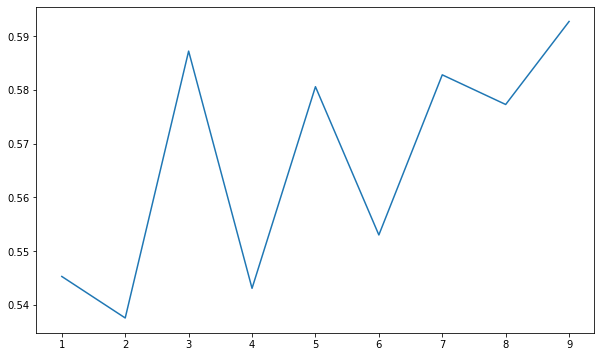

In [ ]:
plt.plot(range(1,Ks), mean_acc)
print(mean_acc)
plt.gcf().set_size_inches(10, 6)

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train, y_train)
yhat = KNN_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, jaccard_score, log_loss, confusion_matrix, classification_report
import itertools

              precision    recall  f1-score   support

         0.0       0.52      0.46      0.49       380
         1.0       0.64      0.69      0.66       526

    accuracy                           0.59       906
   macro avg       0.58      0.57      0.57       906
weighted avg       0.59      0.59      0.59       906

Confusion matrix, without normalization
[[175 205]
 [164 362]]


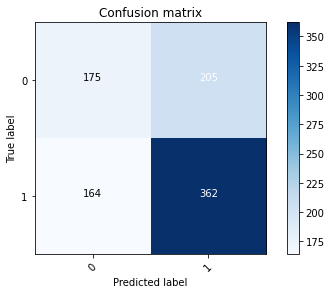

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize= False,  title='Confusion matrix')

In [ ]:
KNN_jaccard_score = jaccard_score(y_test, yhat, pos_label = 1)
print("Jaccard score:", KNN_jaccard_score)
print("")

KNN_f1 = f1_score(y_test, yhat, average = "weighted")
print("f1 score:", KNN_f1)
print("")

Jaccard score: 0.4952120383036936

f1 score: 0.5887417193261987



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
yhat = LR.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.53      0.35      0.42       380
         1.0       0.62      0.78      0.69       526

    accuracy                           0.60       906
   macro avg       0.58      0.56      0.56       906
weighted avg       0.59      0.60      0.58       906

Confusion matrix, without normalization
[[133 247]
 [116 410]]


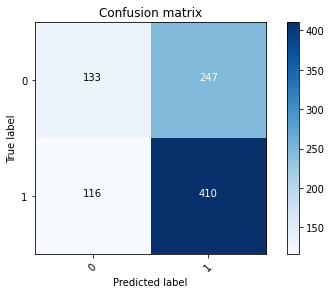

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize= False,  title='Confusion matrix')

In [ ]:
LR_jaccard_score = jaccard_score(y_test, yhat, pos_label=1)
print("Jaccard score:", LR_jaccard_score)
print("")

LR_f1 = f1_score(y_test, yhat, average = "weighted")
print("f1 score:",LR_f1)
print("")

yhat_prob = LR.predict_proba(X_test)
print(yhat_prob[0:5])
print("")
LR_log_loss = log_loss(y_test, yhat_prob)
print("log_ loss score:", LR_log_loss)

Jaccard score: 0.5304010349288486

f1 score: 0.5797991186502168

[[0.24 0.76]
 [0.48 0.52]
 [0.44 0.56]
 [0.37 0.63]
 [0.6  0.4 ]]

log_ loss score: 0.6562422938935213


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(criterion= "entropy", max_depth = 4).fit(X_train, y_train)
yhat = tree_clf.predict(X_test)

In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

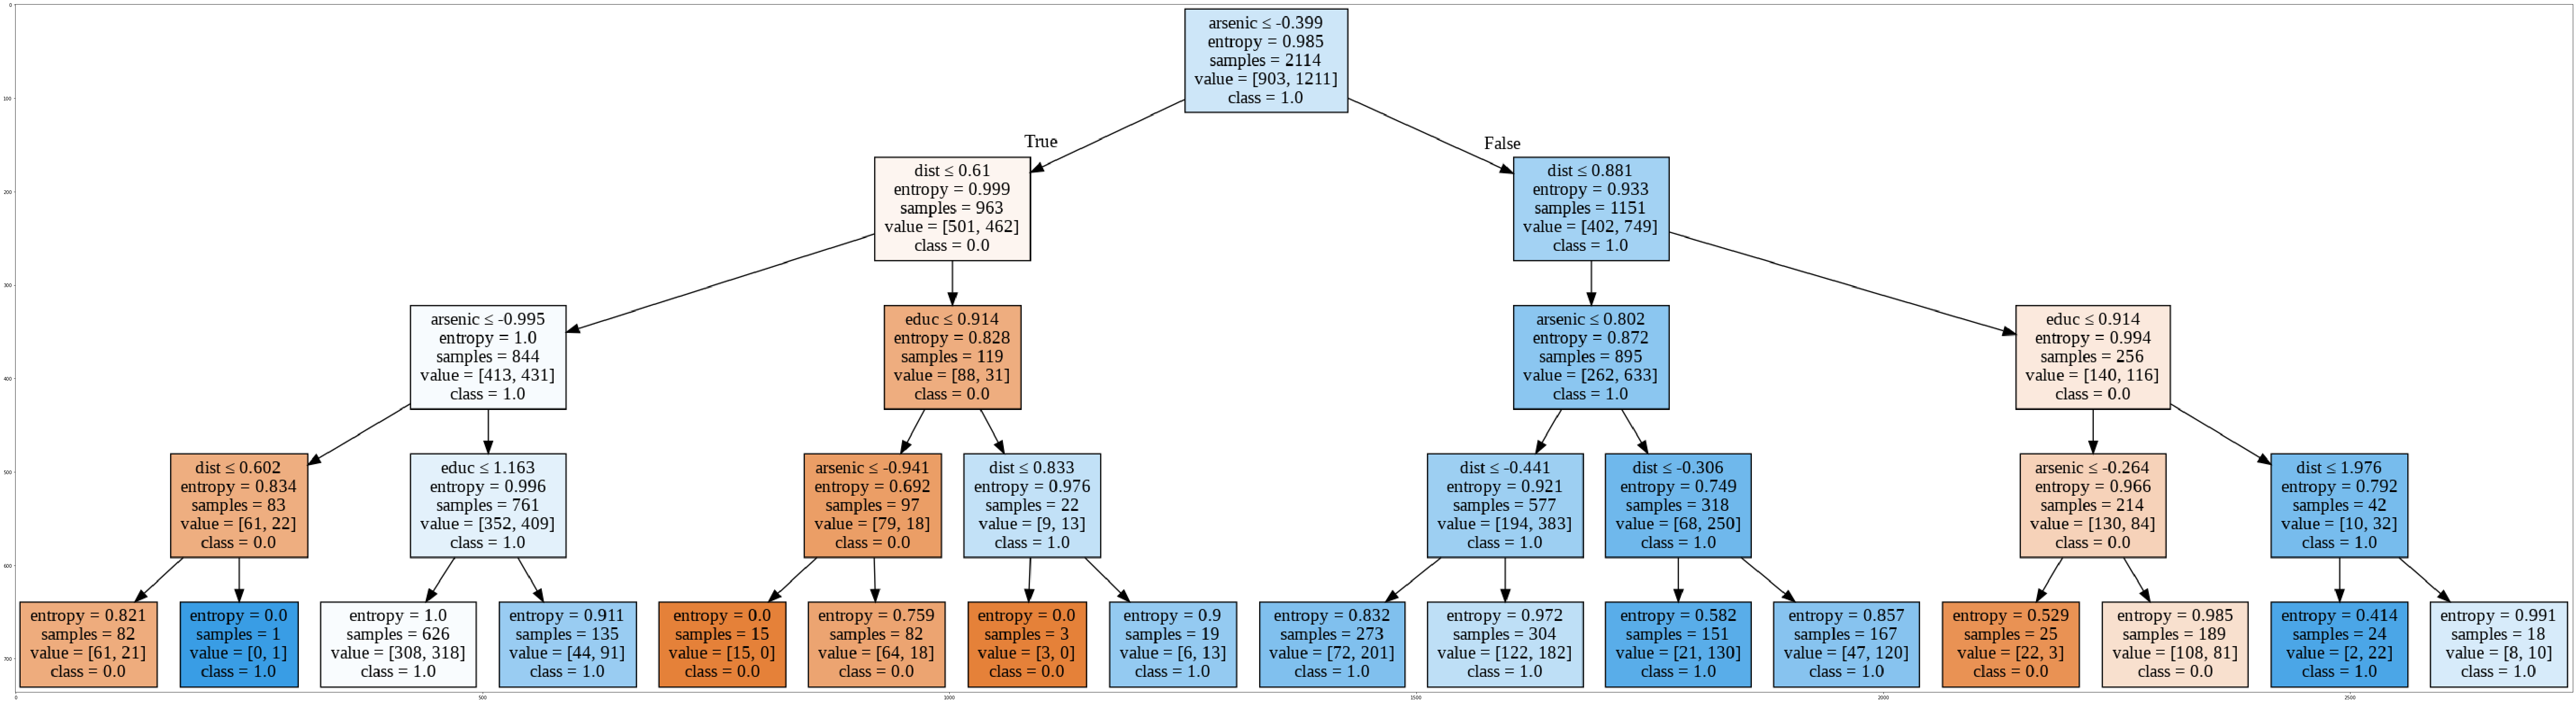

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.drop("switch", axis = 1).columns.astype("string")
out=tree.export_graphviz(tree_clf,feature_names=featureNames,
                         out_file=dot_data,
                         class_names= np.unique(y_train).astype("str"),
                         filled=True,
                         special_characters=True,
                         rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

              precision    recall  f1-score   support

         0.0       0.60      0.25      0.36       380
         1.0       0.62      0.88      0.73       526

    accuracy                           0.62       906
   macro avg       0.61      0.57      0.54       906
weighted avg       0.61      0.62      0.57       906

Confusion matrix, without normalization
[[ 96 284]
 [ 64 462]]


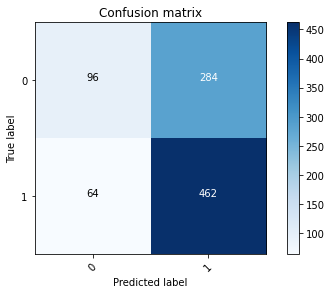

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize= False,  title='Confusion matrix')

In [ ]:
tree_jaccard_score = jaccard_score(y_test, yhat, pos_label=1)
print("Jaccard score:", tree_jaccard_score)
print("")

tree_f1 = f1_score(y_test, yhat, average = "weighted")
print("f1 score:", tree_f1)
print("")

Jaccard score: 0.5703703703703704

f1 score: 0.570866943414738



# SVM

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'rbf').fit(X_train, y_train) 
yhat = svm_clf.predict(X_test)
yhat[0:10]

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1.])

              precision    recall  f1-score   support

         0.0       0.56      0.37      0.45       380
         1.0       0.64      0.79      0.71       526

    accuracy                           0.62       906
   macro avg       0.60      0.58      0.58       906
weighted avg       0.61      0.62      0.60       906

Confusion matrix, without normalization
[[142 238]
 [110 416]]


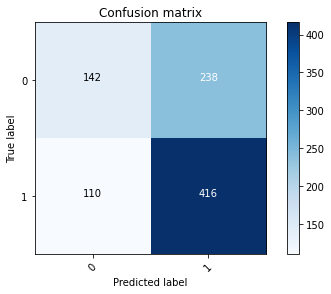

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize= False,  title='Confusion matrix')

In [ ]:
svm_jaccard_score = jaccard_score(y_test, yhat, pos_label=1)
print("Jaccard score:", svm_jaccard_score)
print("")

svm_f1 = f1_score(y_test, yhat, average = "weighted")
print("f1 score:", svm_f1)
print("")

Jaccard score: 0.5445026178010471

f1 score: 0.5978300992738107



| Model          | Jaccard Score | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.495    | 0.589     | NA      |
| LogisticRegression | 0.53     | 0.58      | 0.656   |
| Decision Tree      | 0.57     | 0.57      | NA      |
| SVM                | 0.545    | 0.598     | NA      |